# Pymaceuticals Inc.
---

### Analysis

- According to the boxplot, the final tumor volume for mice treated with Capomulin and Ramicane was smaller than for mice treated with other regimens. However, the median and mean final tumor volume for mice treated with Capomulin and Ramicane were similar. It should also be noted there was a higher number of mice treated with Capomulin and Ramicane compared to the other drug regimens.

- As per the Line plot it seems the mouse (ID l509) treated with Capomulin had it's tumor volume varied over the course of the study, starting at 45.0 mm3 at timepoint 0 and reaching a maximum of 48.1 mm3 at timepoint 20 before decreasing to 41.5 mm3 at timepoint 45. Though it may seem the reduction of the tumor volume is a good indicator for the effectiveness of the drug it should also be noted that the number of metastatic sites (i.e., cancer that has spread to other parts of the body) increased over the course of the study, starting at 0 at timepoint 0 and reaching a maximum of 3 at timepoint 45. This suggests that while Capomulin may have had some effect on the primary tumor, it may not have been effective in preventing the spread of the cancer to other parts of the body. It is also possible that other factors, such as the presence of other treatments or therapies or the natural course of the disease, could have influenced these changes.   

- A correlation of 0.84 indicates that there is a strong positive relationship between mouse weight and average tumor volume. This means that as mouse weight increases, the average tumor volume also tends to increase. It is important to note, however, that correlation does not necessarily imply causation, so further research would be needed to understand the underlying mechanisms that may be driving this relationship.

- Additional data is required to derive an accurate conclution.

In [491]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(study_results, mouse_metadata, on ="Mouse ID", how="left")

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [492]:
# Checking the number of mice.
num_mice = combined_data["Mouse ID"].nunique()
num_mice

249

In [493]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [494]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_data[combined_data['Mouse ID'] == 'g989']
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [495]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data['Mouse ID'] != 'g989'].drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [496]:
# Checking the number of mice in the clean DataFrame.
cleaned_num_mice = clean_data['Mouse ID'].nunique()
cleaned_num_mice

248

## Summary Statistics

In [497]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Group the combined_data DataFrame by the 'Drug Regimen' column
regimen_group = combined_data.groupby('Drug Regimen')

# Calculate the mean, median, variance, standard deviation, and SEM of the 'Tumor Volume (mm3)' column for each drug regimen
regimen_stats = pd.DataFrame({
    'Mean Tumor Volume': regimen_group['Tumor Volume (mm3)'].mean(),
    'Median Tumor Volume': regimen_group['Tumor Volume (mm3)'].median(),
    'Tumor Volume Variance': regimen_group['Tumor Volume (mm3)'].var(),
    'Tumor Volume Std. Dev.': regimen_group['Tumor Volume (mm3)'].std(),
    'Tumor Volume Std. Err.': regimen_group['Tumor Volume (mm3)'].sem()
})

# Display the resulting DataFrame
regimen_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [498]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

regimen_stats = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])



# NOTE - If you do not see "Tumor Volume (mm3)" due to difference in Pandas version please use the following code:

# regimen_stats.columns=pd.MultiIndex.from_product([['Tumor Volume (mm3)'],regimen_stats.columns])
# regimen_stats.style.set_table_styles([
#     ('th.level0', {'text-align': 'right'})
# ])

regimen_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

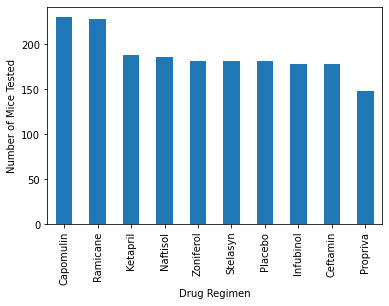

In [499]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Group the data by 'Drug Regimen' and count the number of timepoints for each regimen
timepoints_by_regimen = clean_data.groupby('Drug Regimen').size().sort_values(ascending=False)

# Create a bar plot of the timepoints by regimen using pandas.DataFrame.plot
timepoints_by_regimen.plot(kind='bar', x='Drug Regimen', y='Number of Timepoints', legend=None)

# Add x and y labels
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')

# Show the plot
plt.show()

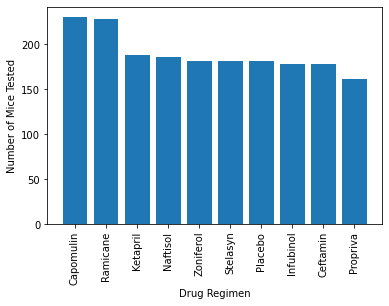

In [500]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Group the data by 'Drug Regimen' and count the number of timepoints for each regimen
timepoints_by_regimen = combined_data.groupby('Drug Regimen').size().sort_values(ascending=False)

# Extract the indices (drug regimens) and values (number of timepoints) from the timepoints_by_regimen Series
regimens = timepoints_by_regimen.index
timepoints = timepoints_by_regimen.values

# Create a bar plot of the timepoints by regimen using matplotlib.pyplot.bar
plt.bar(regimens, timepoints)

# Add x and y labels
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')

# Rotate the x-tick labels to make them easier to read
plt.xticks(rotation=90)

# Show the plot
plt.show()



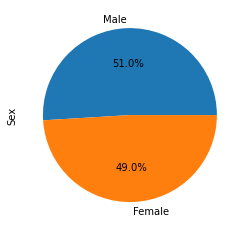

In [501]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Count the number of mice by sex
mice_by_sex = clean_data['Sex'].value_counts()

# Plot the pie chart
mice_by_sex.plot.pie(figsize=(4, 4), autopct='%1.1f%%')

# Show the plot
plt.show()



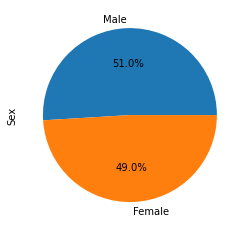

In [502]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Count the number of mice by sex
mice_by_sex = clean_data['Sex'].value_counts()

# Extract the labels and values for the pie chart
labels = mice_by_sex.index
sizes = mice_by_sex.values

# Plot the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.ylabel("Sex")

# Show the plot
plt.show()




## Quartiles, Outliers and Boxplots

In [503]:
# Select the data for the treatment groups of interest
treatment_groups = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
data = clean_data[clean_data['Drug Regimen'].isin(treatment_groups)]

# Group the data by treatment group and select the last timepoint for each mouse
last_timepoints = data.groupby(['Drug Regimen', 'Mouse ID']).max()['Timepoint']
last_timepoints = last_timepoints.reset_index()

# Merge the last timepoints data with the original data to get the tumor volumes at the last timepoint
tumor_volumes = pd.merge(last_timepoints, data, on=['Drug Regimen', 'Mouse ID', 'Timepoint'])

# Calculate the quartiles and IQR for each treatment group
quartiles = tumor_volumes.groupby('Drug Regimen')['Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75]).unstack(level=1)
iqr = quartiles[0.75] - quartiles[0.25]

In [504]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to store potential outliers
outlier_list = []

# Group the data by Mouse ID and select the maximum Timepoint for each mouse
max_timepoint_df = clean_data.groupby('Mouse ID')['Timepoint'].max()
max_timepoint_df.reset_index()

# Merge the data with the original clean_data dataframe to create a new dataframe with only rows with the max Timepoint value for each mouse
merged_df = pd.merge(max_timepoint_df,clean_data, on=['Mouse ID','Timepoint'],how='left')

# Loop through each treatment
for treatment in treatments:
    # Create a subset of merged_df for the current treatment
    treatment_df = merged_df.loc[merged_df['Drug Regimen'] == treatment]
    
    # Extract the Tumor Volume (mm3) column from the treatment dataframe
    tumor_values = treatment_df['Tumor Volume (mm3)']
    
    # Calculate the quartiles and IQR
    quartiles = tumor_values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # Calculate the upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Find potential outliers
    outliers = treatment_df[(treatment_df['Tumor Volume (mm3)'] < lower_bound) | (treatment_df['Tumor Volume (mm3)'] > upper_bound)]
    
    # Append the list of potential outliers for the current treatment to the outlier_list
    outlier_list.append(outliers['Tumor Volume (mm3)'])

# Print the results
print(f"Capomulin's potential outliers: {outlier_list[0]}")
print(f"Ramicane's potential outliers: {outlier_list[1]}")
print(f"Infubinol's potential outliers: {outlier_list[2]}")
print(f"Ceftamin's potential outliers: {outlier_list[3]}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


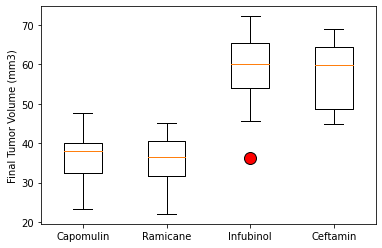

In [505]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Group the tumor_volumes dataframe by 'Drug Regimen' and extract the 'Tumor Volume (mm3)' column for each group
tumor_volume_data = tumor_volumes.groupby('Drug Regimen')['Tumor Volume (mm3)']

# Convert the data to a list of lists
tumor_volume_data = [group.tolist() for _, group in tumor_volume_data]

# Get the list of treatment groups
treatments = tumor_volumes['Drug Regimen'].unique()

# Reorder the tumor_volume_data and treatments lists to match the desired order
tumor_volume_data = [tumor_volume_data[i] for i in [0, 3, 2, 1]]
treatments = [treatments[i] for i in [0, 3, 2, 1]]

# Create a figure and set the figure size
fig, ax = plt.subplots(figsize=(6,4))

# Use the boxplot function to plot the tumor volume data for each treatment group
bp = ax.boxplot(tumor_volume_data, labels=treatments, flierprops={'markerfacecolor': 'r', 'markersize': 12})

# Set the y-axis label
ax.set_ylabel('Final Tumor Volume (mm3)')

# Show the plot
plt.show()

## Line and Scatter Plots

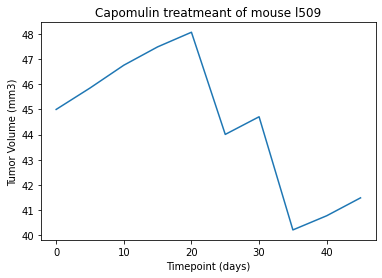

In [506]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Select the data for the mouse treated with Capomulin
mouse_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

# Select the data for a specific mouse
mouse_id = 'l509'
selected_mouse_data = mouse_data[mouse_data['Mouse ID'] == mouse_id]

# Generate the line plot
selected_mouse_data.plot(x='Timepoint', y='Tumor Volume (mm3)', title='Capomulin treatmeant of mouse ' + mouse_id, legend=False)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

# Display the plot
plt.show()

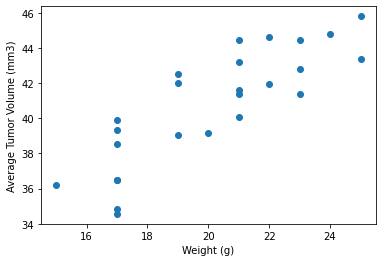

In [507]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Select data for only the Capomulin regimen
capomulin_df = mouse_data[mouse_data["Drug Regimen"] == "Capomulin"]

# Group the data by Mouse ID
capomulin_df_grouped = capomulin_df.groupby("Mouse ID")

# Calculate the average tumor volume for each Mouse ID
avg_tumor_capomulin = capomulin_df_grouped["Tumor Volume (mm3)"].mean()

# Get the unique weight values for each Mouse ID
mouse_weights = capomulin_df_grouped["Weight (g)"].mean()

# Plot the relationship between mouse weight and average tumor volume
plt.scatter(mouse_weights, avg_tumor_capomulin)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


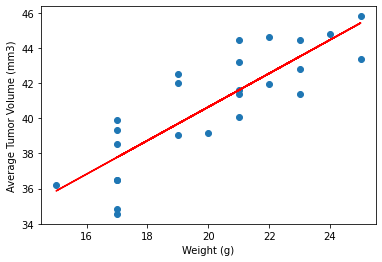

In [508]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Perform a linear regression for mouse weight and average tumor volume for the Capomulin
slope, intercept, r_value, p_value, std_err = linregress(mouse_weights, avg_tumor_capomulin)

# Get regression values
regress_values = mouse_weights * slope + intercept

#Correlation
print(f"The correlation between mouse weight and the average tumor volume is {'{:,.2f}'.format(r_value)}")

# Plot the data
plt.scatter(mouse_weights, avg_tumor_capomulin)
plt.plot(mouse_weights, regress_values, "r")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()